Aquí lo que vamos a presentar, es una visualización de los vectores de caraterisiticas que estamos generan con la red, donde mostramos el conjunto de entrenamiento como una muestra de las regiones y el conjunto de evaluacion, donde esta clasificando estas imagenes en que region.

- El objetivo de esta visualizacion es, dar una idea de que tanto cambian las representaciones de nuestro conjunto.


In [1]:
from torchvision import datasets, transforms
import torch
from torch import nn
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

In [21]:
batch_size = 1
device = "cuda"
print(torch.cuda.is_available())

True


In [4]:
data_dir = "../data" 
# Conjunto de datos MNIST
train_data = datasets.MNIST(
    root=data_dir,
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
eval_data = datasets.MNIST(
    root=data_dir,
    train=False,
    download=True,
    transform=transforms.ToTensor()
)

train_dataloader = DataLoader(train_data, batch_size, shuffle=True)

print("Se cargaron los datos correctamente")

Se cargaron los datos correctamente


In [14]:

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        ) 

    def forward(self, x):
        x = self.flatten(x)
        embedding = self.linear_relu_stack[:-1](x)  
        logits = self.linear_relu_stack(x)
        return embedding, logits

In [52]:
[(num+15, train_data[i][1]) for num, i in enumerate(range(15, 40))]



[(15, 7),
 (16, 2),
 (17, 8),
 (18, 6),
 (19, 9),
 (20, 4),
 (21, 0),
 (22, 9),
 (23, 1),
 (24, 1),
 (25, 2),
 (26, 4),
 (27, 3),
 (28, 2),
 (29, 7),
 (30, 3),
 (31, 8),
 (32, 6),
 (33, 9),
 (34, 0),
 (35, 5),
 (36, 6),
 (37, 0),
 (38, 7),
 (39, 6)]

In [27]:
from pprint import pprint
estado_fase_0 = torch.load('Fase_0.pth')
estado_fase_1 = torch.load('Fase_1.pth')

estado_fase_1["linear_relu_stack.4.weight"][5:10, :] = estado_fase_0["linear_relu_stack.4.weight"][5:10, :]
estado_fase_1["linear_relu_stack.4.bias"][5:10] = estado_fase_0["linear_relu_stack.4.bias"][5:10]

In [36]:
print("Weights Norm:")
wn = [(indice ,torch.norm(row) ) for indice ,row in enumerate(estado_fase_1["linear_relu_stack.4.weight"])]
pprint(wn)
print("Bias:")
bias = [(indice ,row ) for indice ,row in enumerate(estado_fase_1["linear_relu_stack.4.bias"])]
pprint(bias)

Weights Norm:
[(0, tensor(1.0966, device='cuda:0')),
 (1, tensor(1.1971, device='cuda:0')),
 (2, tensor(1.0860, device='cuda:0')),
 (3, tensor(1.0435, device='cuda:0')),
 (4, tensor(1.0837, device='cuda:0')),
 (5, tensor(0.6537, device='cuda:0')),
 (6, tensor(0.6658, device='cuda:0')),
 (7, tensor(0.6536, device='cuda:0')),
 (8, tensor(0.6560, device='cuda:0')),
 (9, tensor(0.6453, device='cuda:0'))]
Bias:
[(0, tensor(-0.0329, device='cuda:0')),
 (1, tensor(0.2524, device='cuda:0')),
 (2, tensor(0.0166, device='cuda:0')),
 (3, tensor(0.0098, device='cuda:0')),
 (4, tensor(0.0994, device='cuda:0')),
 (5, tensor(-0.0808, device='cuda:0')),
 (6, tensor(-0.1150, device='cuda:0')),
 (7, tensor(-0.0970, device='cuda:0')),
 (8, tensor(-0.1229, device='cuda:0')),
 (9, tensor(-0.0929, device='cuda:0'))]


In [73]:
l = list()

In [79]:

model = NeuralNetwork().to(device)
model.load_state_dict(estado_fase_1)
n = 51
with torch.no_grad():
    X, y = train_data[n]
    X = X.to(device)
    features, logist = model(X)

l.append(features)
print(train_data[n][1])
print(torch.argmax(logist))
pprint(logist)
print(features)




0
tensor(0, device='cuda:0')
tensor([[ -0.3575,  -8.8931,  -7.7065,  -0.9000, -10.8564,  -2.0608,  -2.4212,
          -2.8084,  -1.8837,  -2.7626]], device='cuda:0')
tensor([[0.0000, 1.2346, 0.0393, 0.0000, 0.4499, 0.4409, 0.0000, 0.7889, 0.7777,
         0.7894, 0.9069, 0.0000, 0.0000, 0.7618, 0.0000, 0.6515, 0.9996, 0.0663,
         1.5528, 0.6361, 1.7325, 0.8194, 0.1025, 2.1523, 1.4281, 0.1344, 1.8716,
         0.3514, 2.4249, 0.0000, 1.5253, 0.1530, 0.3011, 0.8529, 1.0899, 0.0000,
         0.0000, 0.0000, 0.0965, 0.8021, 0.0000, 0.0000, 0.0000, 0.0000, 2.5985,
         0.7638, 0.0000, 2.5817, 0.1639, 0.4743, 1.6048, 1.2440, 1.1914, 2.7521,
         0.0000, 0.1869, 0.0000, 0.0219, 0.0000, 0.0000, 0.0000, 0.0000, 0.4986,
         1.8590, 0.0114, 0.0000, 0.3414, 0.7340, 0.5786, 1.8886, 0.0000, 0.4142,
         2.4011, 0.0000, 0.0000, 0.0000, 0.5347, 1.1256, 0.9714, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.9864, 0.1484, 0.0000, 0.0000, 1.8522, 0.3146,
         0.0000, 0.0000,

In [80]:
len(l)

4

In [63]:
import torch.nn.functional as F

In [81]:
# Normalizar los embeddings
embedding1 = F.normalize(l[2], p=2, dim=1)
embedding2 = F.normalize(l[3], p=2, dim=1)

# Calcular la similitud del coseno
similitud_coseno = torch.mm(embedding1, embedding2.t())

print("Similitud del coseno entre los dos embeddings:", similitud_coseno.item())

Similitud del coseno entre los dos embeddings: 0.9454213380813599


## Modelo Etapa 1

Vamos a visualizar si los datos todos los datos, para ver si realiza una agrupación o se superponen los datos.

In [6]:
fase_1 = torch.load("Fase_1.pth")
# Quitamos el clasificador
del fase_1["linear_relu_stack.4.weight"]
del fase_1["linear_relu_stack.4.bias"]

In [7]:
model = NeuralNetwork().to(device)
model.load_state_dict(fase_1)

<All keys matched successfully>

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.010s...
[t-SNE] Computed neighbors for 60000 samples in 48.220s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

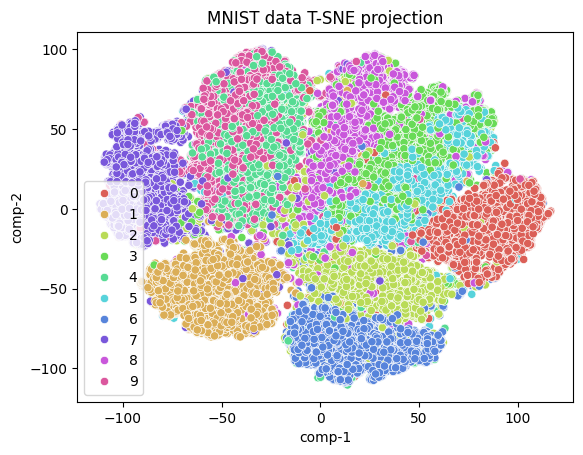

In [8]:

features, labels = extractor(train_dataloader, model)

# Usar t-SNE para reducir las dimensiones a 2
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(features)

# Crear un DataFrame para la visualización con seaborn
df = pd.DataFrame()
df["y"] = labels.tolist()
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

# Visualizar con seaborn
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")


- La clase 9 y la 4 estan teniendo una superposición igual para la 5 y 3, igual el 3 y 8.

## Modelo Etapa 0

In [9]:
fase_0 = torch.load("Fase_0.pth")
# Quitamos el clasificador
del fase_0["linear_relu_stack.4.weight"]
del fase_0["linear_relu_stack.4.bias"]

model = NeuralNetwork().to(device)
model.load_state_dict(fase_0)

<All keys matched successfully>

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.010s...
[t-SNE] Computed neighbors for 60000 samples in 46.997s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'MNIST data T-SNE projection')]

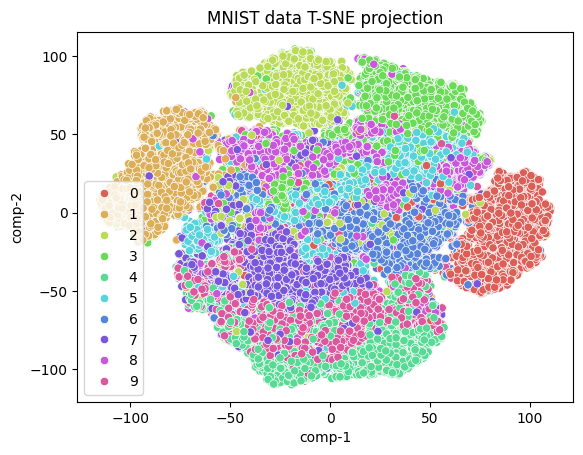

In [10]:

features, labels = extractor(train_dataloader, model)

# Usar t-SNE para reducir las dimensiones a 2
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(features)

# Crear un DataFrame para la visualización con seaborn
df = pd.DataFrame()
df["y"] = labels.tolist()
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

# Visualizar con seaborn
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="MNIST data T-SNE projection")


- Aquí se ve que aún no ha separado las clases que no ha visto.